In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import random 
from datetime import datetime 

In [2]:
def Model1_Simulation(q1, q2, lambda_1, lambda_2, lambda_3, gamma_1, gamma_2, gamma_3, TERM):
    r1 = 1-q1
    r2 = 1-q2
    TNOW = 0  
    Q1 = 0
    Q2 = 0
    Q3 = 0 
    AQ1 = 0 
    AQ2 = 0 
    AQ3=0
    
    # Initialise number of iterations to be 0 
    iteration = 0 
    #Initialise number of arrivals, matches and abandonments to be 0 
    Matches_CE = 0
    Matches_EE = 0 
    Matches_Job = 0 
    
    Arrivals_CE = 0
    Arrivals_EE = 0 
    Arrivals_Job = 0 
    
    Abandonment_CE = 0
    Abandonment_EE = 0
    Abandonment_Job = 0 
    
    
    
    # Initalise vector to store the time 
    Time_v = []
    
    
    # Initialize event calander to be a 4d vector 
    EC= ([0]*4)
    if(lambda_1 > 0):
        EC[0] = -(np.log(1-np.random.uniform(0, 1))/lambda_1)
    else:
        EC[0] = TERM+1
    EC[1] = -(np.log(1-np.random.uniform(0, 1))/lambda_2)
    EC[2] = -(np.log(1-np.random.uniform(0, 1))/lambda_3)
    EC[3] = TERM
    EC = np.array(EC)
    
    while TNOW < TERM:
        #print(EC)
        iteration +=1
        
        # Time of next event is minimum entry in event calender
        TNEXT = EC.min()
        
        # Type of next event (index of minimum entry in event calender)
        ENEXT = EC.argmin()
        
        # Update area statistics
        AQ1 += ((TNEXT-TNOW)*Q1)
        AQ2 += ((TNEXT-TNOW)*Q2)
        AQ3 += ((TNEXT-TNOW)*Q3)
        
        # Update time vector 
        TNOW = TNEXT
        Time_v = np.append(Time_v, TNOW)
        

        # Next event is arrival of a CE
        if(ENEXT==0):
           # print('CE arrival')
            
            # Increase CE arrivals by 1 
            Arrivals_CE += 1 
            
            # Initialise m=0 to be the matchings found for this CE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):
                
                
                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r1)):
                        #print('CE matches with job')
                        # CE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase CE and job matches by 1
                        Matches_CE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                
                        break
                
            # If there are no matches found or possible then CE joins the queue 
            if(m == 0):
              #  print('No match join queue')
                # update EC to inlude abandonment time of that CE 
                EC=np.insert(EC, (4+Q1), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_1)))
                
                # Joins queue 
                Q1 += 1
                
                
                
            # Update EC to include next arrival time of CE
            EC[0]=TNOW -(np.log(1-np.random.uniform(0, 1))/lambda_1)
        
        
        
        # Next event is arrival of a EE
        elif(ENEXT==1):
           # print('EE arrival')
            
            # Increase EE arrivals by 1 
            Arrivals_EE += 1 
            
            # Initialise m=0 to be the matchings found for this EE 
            m=0
            
            # If there are jobs to match with 
            if(Q3 > 0 ):

                
                # Loop through each job and check matching 
                for i in range(Q3):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < probability of matching 
                    if(u < (1-r2)):
                       # print('EE matches with job')
                        # EE matches with job and they both leave system 
                        m += 1 
                        Q3 -= 1 
                        
                        # Increase EE and job matches by 1
                        Matches_EE += 1 
                        Matches_Job += 1 
                        
                        # Update event calender to remove abandonment time of that job
                        EC = np.delete(EC, (4+Q1+Q2+i))
                        break
                
            # If there are no matches found or possible then EE joins the queue 
            if(m == 0):
              #  print('No match join queue ')
                # update EC to inlude abandonment time of that EE 
                EC=np.insert(EC, (4+Q1+Q2), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_2)))
    
                
                # Joins queue 
                Q2 += 1
                
            
                
                
            # Update EC to include next arrival time of EE
            EC[1]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_2)
            
        # Next event is arrival of job 
        elif(ENEXT == 2):
          #  print('Job arrival')
            
            # Initialise matches to be 0 
            m = 0 
            
            # Increase arrivals by 1
            Arrivals_Job += 1
            
            # CE > EE so first check if there are matches with CE
            if(Q1 > 0):
                
                # Loop through each CE and check for a match
                for i in range(Q1):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-r (probability of matching) then a match is found
                    if(u < (1-r1)):
                        
                        # Job Matches and leaves the system with the CE
                       # print('Job Matches with CE')
                        m += 1 
                        Q1 -= 1
                        
                        # Increase matches of job and CE by 1 
                        Matches_Job += 1
                        Matches_CE += 1 
                        
                        # Update event calender to remove abandonment time of the CE 
                        EC = np.delete(EC, (4+i))
                        break 
                        
            # If job didnt match with CE and there are EEs check for match
            if(Q2 > 0 and m == 0):
                
                # Loop through each EE and check for a match 
                for i in range(Q2):
                    
                    # Generate uniform RV for checking 
                    u = np.random.uniform(0,1)
                    
                    # if u < 1-2 (probability of matching) then a match is found
                    if(u < (1-r2)):
                      #  print('Job matches with EE')
                        # Job Matches and leaves the system with the EE
                        
                        m += 1 
                        Q2 -= 1
                        
                        # Increase matches of job and EE by 1 
                        Matches_Job += 1
                        Matches_EE += 1 
                        
                        # Update event calender to remove abandonment time of the EE 
                        EC = np.delete(EC, (4+Q1+i))
                        break
            # If no CE or EE to match or no match found, then job joins the job queue  
            if(m == 0):
             #   print('No match join queue')
                # Update EC to include abandonment time of the job
                EC = np.insert(EC, (4+Q1+Q2+Q3), (TNOW-(np.log(1-np.random.uniform(0, 1))/gamma_3)))
                # Job joinss job queue 
                Q3 += 1 
                
            # Update event calander to include next arrival of job 
            EC[2]=TNOW-(np.log(1-np.random.uniform(0, 1))/lambda_3)
        
        
        # Next event is abandonment of CE
        elif((ENEXT>3) and (ENEXT<=(3+Q1))):
          #  print('CE abandonment')
            # Q1 decreases by 1 
            Q1 -= 1
            # Abandonment increases by 1
            Abandonment_CE += 1
            # Remove abandonment time frmo event calendar 
            EC = np.delete(EC, ENEXT)
            
            
        # If next event is an abandonment of EE (Q2)
        elif((ENEXT>(3+Q1)) and (ENEXT<=(3+Q1+Q2))):
          #   print('EE abandonment')
            # Q2 decreases by 1 
             Q2 -= 1
            # Abandonment Increases by 1
             Abandonment_EE += 1
            # Remove abandonment time from event calendar 
             EC = np.delete(EC, ENEXT)
            #print('Q2 abandonment')
            #print(EC)
        
        # Next event is abandonment of Job (Q3)
        elif((ENEXT>(3+Q1+Q2)) and (ENEXT<=(3+Q1+Q2+Q3))):
            # Q3 decreases by 1
            Q3 -= 1
             # Abandonment increases by 1
            Abandonment_Job += 1
             # Remove abandonment time from event calendar
            EC = np.delete(EC, ENEXT)
             
        
             
    T_Q = AQ1+AQ2+AQ3  
    if(Arrivals_CE > 0):
        CEMatchRate = Matches_CE/Arrivals_CE
        CEAbandonRate = Abandonment_CE/Arrivals_CE
    else:
        CEMatchRate = 0
        CEAbandonRate = 0
    if(Arrivals_EE>0):
        EEMatchRate = Matches_EE/Arrivals_EE
        EEAbandonRate = Abandonment_EE/Arrivals_EE
    else:
        EEMatchRate = 0 
        EEAbandonRate = 0
    if(Arrivals_Job > 0):
        JobMatchRate = Matches_Job/Arrivals_Job
        JobAbandonRate = Abandonment_Job/Arrivals_Job
    else:
        JobMatchRate = 0
        JobAbandonRate = 0 
    if(Arrivals_CE +Arrivals_EE+Arrivals_Job > 0):
        TotalMatchRate = ((Matches_CE+Matches_EE+Matches_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
        TotalAbandonRate = ((Abandonment_CE+Abandonment_EE+Abandonment_Job)/(Arrivals_CE+Arrivals_EE+Arrivals_Job))
    else:
        TotalMatchRate = 0
        TotalAbandonRate = 0
        
    
    
    Av_AQ1= AQ1/TERM
    Av_AQ2= AQ2/TERM
    Av_AQ3= AQ3/TERM
    Av_Total= T_Q/TERM
    

     return Av_AQ1, Av_AQ2, Av_AQ3, CEMatchRate, EEMatchRate, JobMatchRate, TotalMatchRate, CEAbandonRate, EEAbandonRate, JobAbandonRate, TotalAbandonRate , Av_Total



             
             

        
        
                
                        
            
                
                
        

In [16]:
print(datetime. now())

lambda_3 = [0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4]
CE_Match_rates = []
EE_Match_rates = []
Job_Match_rates = []
Total_Match_rates = []
CE_Abandon_rates = []
EE_Abandon_rates = []
Job_Abandon_rates = []
Total_Abandon_rates = []
CE_Queue_length = []
EE_Queue_length = []
Job_Queue_length = []
Total_Queue_length = []



for i in range(len(lambda_3)):
    Lambda_3 = lambda_3[i]
    print(lambda_3[i])
    print(i)
    CE_Rep_m_rate = []
    EE_Rep_m_rate = []
    Job_Rep_m_rate = []
    Total_Rep_m_rate = []
    CE_Rep_a_rate = []
    EE_Rep_a_rate = []
    Job_Rep_a_rate = []
    Total_Rep_a_rate = []
    CE_Rep_q_length = []
    EE_Rep_q_length = []
    Job_Rep_q_length = []
    Total_Rep_q_length = []
    
    for j in range(2):
        print(j)
        print(datetime. now())
        rep_results=Job_sim(0.75, 0.5, 1, 1, lambda_3[i], 0.1, 0.1, 0.05, 30000)
        CE_Rep_m_rate = np.append(CE_Rep_m_rate, rep_results[3])
        EE_Rep_m_rate = np.append(EE_Rep_m_rate, rep_results[4])
        Job_Rep_m_rate = np.append(Job_Rep_m_rate, rep_results[5])
        Total_Rep_m_rate = np.append(Total_Rep_m_rate, rep_results[6])
        CE_Rep_a_rate = np.append(CE_Rep_a_rate, rep_results[7])
        EE_Rep_a_rate = np.append(EE_Rep_a_rate, rep_results[8])
        Job_Rep_a_rate = np.append(Job_Rep_a_rate, rep_results[9])
        Total_Rep_a_rate = np.append(Total_Rep_a_rate, rep_results[10])
        CE_Rep_q_length = np.append(CE_Rep_q_length, rep_results[0])
        EE_Rep_q_length = np.append(EE_Rep_q_length, rep_results[1])
        Job_Rep_q_length = np.append(Job_Rep_q_length, rep_results[2])
        Total_Rep_q_length = np.append(Total_Rep_q_length, rep_results[11])
    CE_Match_rates = np.append(CE_Match_rates, np.average(CE_Rep_m_rate))
    EE_Match_rates = np.append(EE_Match_rates, np.average(EE_Rep_m_rate))
    Job_Match_rates = np.append(Job_Match_rates, np.average(Job_Rep_m_rate))
    Total_Match_rates = np.append(Total_Match_rates, np.average(Total_Rep_m_rate))
    CE_Abandon_rates = np.append(CE_Abandon_rates, np.average(CE_Rep_a_rate))
    EE_Abandon_rates = np.append(EE_Abandon_rates, np.average(EE_Rep_a_rate))
    Job_Abandon_rates = np.append(Job_Abandon_rates, np.average(Job_Rep_a_rate))
    Total_Abandon_rates = np.append(Total_Abandon_rates, np.average(Total_Rep_a_rate))
    CE_Queue_length = np.append(CE_Queue_length, np.average(CE_Rep_q_length))
    EE_Queue_length = np.append(EE_Queue_length, np.average(EE_Rep_q_length))
    Job_Queue_length = np.append(Job_Queue_length, np.average(Job_Rep_q_length))
    Total_Queue_length = np.append(Total_Queue_length, np.average(Total_Rep_q_length))
    
    print(CE_Match_rates)
    print(EE_Match_rates)
    print(Job_Match_rates)
    print(Total_Match_rates)
    print(CE_Abandon_rates)
    print(EE_Abandon_rates)
    print(Job_Abandon_rates)
    print(Total_Abandon_rates)
    print(CE_Queue_length)
    print(EE_Queue_length)
    print(Job_Queue_length)
    print(Total_Queue_length)

    
    
print(datetime. now())   

2023-08-23 16:31:38.126498
0
0
0
2023-08-23 16:31:38.127965


/Users/corinnephillips/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in double_scalars


1
2023-08-23 16:31:56.033135
[0.]
[0.]
[0.]
[0.]
[0.99971481]
[0.99966558]
[0.]
[0.99969035]
[9.99140509]
[9.97125764]
[0.]
[19.96266273]
0.2
1
0
2023-08-23 16:32:10.682694
1
2023-08-23 16:32:26.985863
[0.         0.20086918]
[0.         0.00088285]
[0. 1.]
[0.         0.18323428]
[0.99971481 0.79881439]
[0.99966558 0.99875058]
[0. 0.]
[0.99969035 0.81645556]
[9.99140509 8.02816834]
[9.97125764 9.95495546]
[0.00000000e+00 9.49227185e-06]
[19.96266273 17.98313329]
0.4
2
0
2023-08-23 16:32:40.911714
1
2023-08-23 16:32:59.259931
[0.         0.20086918 0.38637252]
[0.         0.00088285 0.01052353]
[0. 1. 1.]
[0.         0.18323428 0.33257142]
[0.99971481 0.79881439 0.61349516]
[0.99966558 0.99875058 0.98905956]
[0. 0. 0.]
[0.99969035 0.81645556 0.66720035]
[9.99140509 8.02816834 6.16090612]
[9.97125764 9.95495546 9.87034603]
[0.00000000e+00 9.49227185e-06 7.58276132e-05]
[19.96266273 17.98313329 16.03132797]
0.6
3
0
2023-08-23 16:33:17.741447
1
2023-08-23 16:33:40.400546
[0.         0.200

1
2023-08-23 16:38:13.448669
[0.         0.20086918 0.38637252 0.5471417  0.66744649 0.75426826
 0.81550738 0.86229226 0.90033959 0.93525674 0.96225403]
[0.         0.00088285 0.01052353 0.04891308 0.12701193 0.24671767
 0.37674725 0.52769615 0.66752051 0.78725043 0.87881812]
[0.         1.         1.         0.99991635 0.99977045 0.99872014
 0.99655279 0.99028712 0.97688459 0.95608435 0.91784273]
[0.         0.18323428 0.33257142 0.45996579 0.56906012 0.66734407
 0.74592459 0.81722141 0.86960205 0.90620742 0.91910753]
[0.99971481 0.79881439 0.61349516 0.45275877 0.33242071 0.24569838
 0.18439253 0.13760803 0.09966041 0.06474326 0.03772914]
[0.99966558 0.99875058 0.98905956 0.95085358 0.87267235 0.75304828
 0.62310304 0.4722367  0.33231241 0.21261619 0.12116518]
[0.00000000e+00 0.00000000e+00 0.00000000e+00 8.36511679e-05
 2.29549357e-04 1.27986473e-03 3.44721345e-03 9.71287886e-03
 2.30527156e-02 4.39156496e-02 8.21323003e-02]
[0.99969035 0.81645556 0.66720035 0.53990637 0.43077952 0.

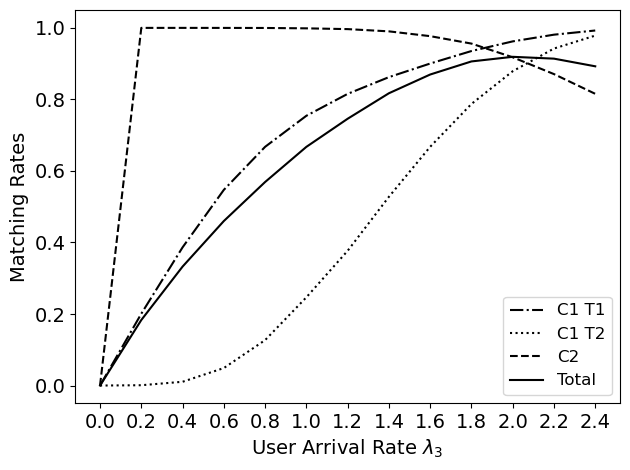

In [19]:
plt.xlabel(r'User Arrival Rate $\lambda_3$', fontsize=14)
plt.ylabel('Matching Rates', fontsize=14)
plt.plot(lambda_3, CE_Match_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda_3, EE_Match_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda_3, Job_Match_rates,  linestyle='dashed', label = 'C2', color='black')
plt.plot(lambda_3, Total_Match_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda_3, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Section2_Exp8_Match.png')
plt.show()

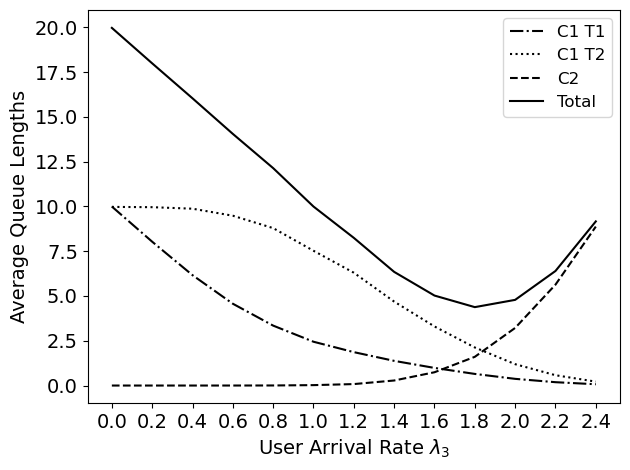

In [20]:
plt.xlabel(r'User Arrival Rate $\lambda_3$', fontsize=14)
plt.ylabel('Average Queue Lengths', fontsize=14)
plt.plot(lambda_3, CE_Queue_length, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda_3, EE_Queue_length, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda_3, Job_Queue_length,  linestyle='dashed', label = 'C2', color='black')
plt.plot(lambda_3, Total_Queue_length, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda_3, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Section2_Exp8_Queue.png')
plt.show()




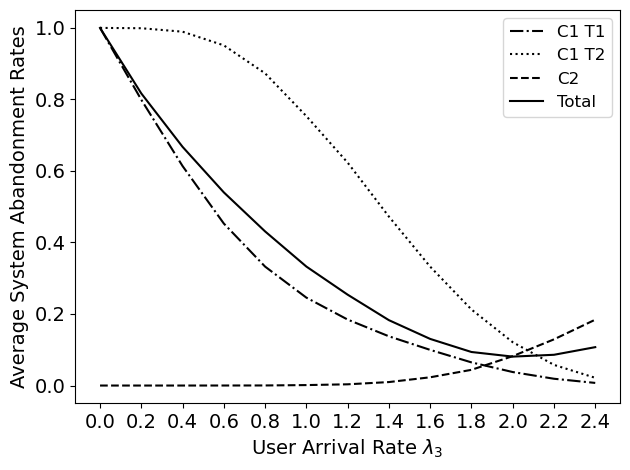

In [21]:
plt.xlabel(r'User Arrival Rate $\lambda_3$', fontsize=14)
plt.ylabel('Average System Abandonment Rates', fontsize=14)
plt.plot(lambda_3, CE_Abandon_rates, linestyle='dashdot', label = 'C1 T1', color='black')
plt.plot(lambda_3, EE_Abandon_rates, linestyle='dotted', label = 'C1 T2', color='black')
plt.plot(lambda_3, Job_Abandon_rates, linestyle='dashed', label = 'C2', color='black')
plt.plot(lambda_3, Total_Abandon_rates, linestyle='solid', label = 'Total', color='black')
plt.xticks(lambda_3, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()
plt.savefig('Section2_Exp8_Abandon.png')
plt.show()

